In [2]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
#from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction import _stop_words
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics


# from sklearn.naive_bayes import GaussianNB # not sure if i will be using naive bayes - guaseian
# from sklearn.linear_model import LogisticRegression #not sure if I will be using this either
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # will use?


%matplotlib inline

In [3]:
df = pd.read_csv('Cleaned_Non_Spam.csv')

In [4]:
df['clean_msg']

0       union methanol peter follow note give monday p...
1            he nom january see attach file hplnol hplnol
2       non retreat around wonder time year non leader...
3       indian spring deal book teno per revenue under...
4       ehronlin web address change message intend ehr...
                              ...                        
3667    crossed energy bristol ranch peter pleas note ...
3668    put transport volume decrees contract thank am...
3669    follow nom he take extra much weekend try next...
3670    calvin daily women julie mention earlier hope ...
3671    industry worksheet august active attach worksh...
Name: clean_msg, Length: 3672, dtype: object

In [6]:
stopwords = ENGLISH_STOP_WORDS
my_stopwords = ENGLISH_STOP_WORDS.union(['ect', 'hou', 'com', 'recipient', 'sent', 'enron', 'cc', 'subject',\
                                         'forwarded', 'corp', 'said', 'attached', 'ect',\
                                         'recipient', 'email', 'original', 'doc', 'pm', 'mail', 'message', 'new'\
                                         'enronxgate', 'na', 'year'])


# tf = TfidfVectorizer(analyzer='word', stop_words=my_stopwords, min_df=2, max_df=0.5)
cv = CountVectorizer(analyzer='word', stop_words=my_stopwords, max_features=2000)

# vectorizer = TfidfVectorizer(stop_words='english')
X = cv.fit_transform(df['clean_msg']) # this is my sparce matrix

In [7]:
pd.set_option('display.max_columns', 500)

In [8]:
# New DataFrame created to remove vectorized numbers
X_df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names()) # this is my dense matrix

In [12]:
X_df.shape

(3672, 2000)

In [11]:

X_df.head(1)

,aback,abacustech,able,absence,accept,access,accomplish,accord,accordingly,account,achieve,acquisit,act,action,active,actual,adam,add,address,adjust,administer,admit,adonai,advance,advantage,advice,advise,adviser,aet,affect,afford,afternoon,age,agenda,agent,ago,agreement,ague,ahead,aim,aime,air,airline,ajar,alan,albrecht,align,allen,allow,altar,alter,amazon,amend,america,american,ami,analysis,analyst,anderson,andrew,angel,angela,anita,ann,anna,anniversary,announce,annual,answer,anthony,anti,anticus,antoinette,apace,apology,appear,applied,apply,appoint,appreci,approach,appropri,approve,approxim,april,arched,area,aren,arm,armstrong,army,arrange,arrive,ask,asp,aspect,assess,asset,assign,assist,assume,atom,att,attach,attempt,attend,attract,audit,aug,august,austin,author,auto,automatic,avail,ave,average,avoid,award,away,baby,backout,bad,bag,bail,bailey,baker,balance,balfour,ball,ballot,bane,bank,bankruptcy,bar,barbara,barrel,barrington,base,baseload,basic,basin,basketful,bass,bassett,baxter,bc,beach,bear,beat,beaumont,beck,bed,began,begin,behalf,believe,belliard,bellum,belong,ben,benedict,benefit,bent,berg,best,beth,better,beverli,bid,big,billion,bind,bite,black,block,blood,blue,boa,board,boat,bob,bobby,bone,book,border,bowed,bowl,box,brandy,brandywine,bravo,bread,break,brennan,brian,bridgelin,brief,brigand,bring,bristol,broadband,broker,brother,brown,bruce,bryan,bryce,bubo,buckled,budget,build,burn,burri,bursa,bush,bushel,busy,button,buy,buyback,buyer,byron,cairo,cal,calendar,calhoun,california,calvin,camden,camelia,camp,campo,canada,canal,cancel,candid,cannon,cap,capable,capital,capture,car,card,care,carl,carlo,carried,carrier,carron,...,stuart,student,stuff,sub,submit,subscribe,substance,success,suggest,suit,sullivan,summary,summer,sun,sunday,sundial,superb,superior,supervisor,supplier,supply,support,suppose,sure,survey,survive,susan,suspend,sutton,swap,sweetly,swell,swift,swing,switch,sylvis,table,tailgat,talent,talk,tap,tar,target,task,tax,taylor,tea,teach,team,technology,ted,telephone,tell,tenaska,tender,tennessee,tennis,teno,term,test,tetanic,text,th,thank,thereof,theresa,thing,think,thomas,thompson,thompsonvil,thou,thursday,tibia,ticket,tidal,tie,tier,till,tim,time,timely,tiny,today,told,tom,tommy,tomorrow,tone,tonight,tool,topic,topics,torch,total,touch,tour,tournament,town,trace,trachea,track,trade,trader,train,trait,transact,transfer,transit,transmit,transport,travel,treat,trevino,trip,trouble,troy,true,truly,trust,try,trying,tuesday,tufts,turbotax,turn,turnaround,txt,type,unable,understand,unfortun,union,unit,unless,unresolv,unsubscrib,update,upgrade,upstream,urban,urgent,usage,use,user,usual,vacant,valadez,valet,valid,valley,valuable,value,valve,van,variance,various,vary,venturato,venture,vera,verify,version,vice,victor,victoria,video,view,viewpoint,village,villi,vincent,visit,vital,voice,voicemail,vol,volatile,volume,vot,vote,wager,wait,walk,walker,wall,walter,want,war,ward,warn,warned,warren,washington,watch,way,weather,web,wed,wednesday,week,weekend,weekly,welcome,welled,went,west,western,westmoreland,white,wholesale,wife,william,wilson,win,window,winter,wire,wiseman,wish,wished,withdraw,woman,women,won,wonder,wood,woodland,word,words,work,worksheet,world,worldnet,worldwide,worth,write,writeoff,wrong,www,xi,yakov,yanowski,yesterday,yonder,york,young,zapata,zero,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [13]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=1, verbose=1)
model.fit(X_df)

Initialization complete
Iteration 0, inertia 1153187.0
Iteration 1, inertia 840905.0714129673
Iteration 2, inertia 829698.0754506078
Iteration 3, inertia 826089.4307979661
Iteration 4, inertia 821405.3062490707
Iteration 5, inertia 801803.4702464252
Iteration 6, inertia 800301.1839128991
Iteration 7, inertia 799503.6364842062
Iteration 8, inertia 799372.705560518
Iteration 9, inertia 799336.9288672304
Converged at iteration 9: strict convergence.


KMeans(n_clusters=5, n_init=1, verbose=1)

In [14]:
from joblib import dump, load
dump(model, 'model.joblib')

['model.joblib']

In [15]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

In [16]:
order_centroids

array([[  12, 1882,  454, ..., 1991,  596,  801],
       [1882,  454, 1354, ..., 1591,  224,  615],
       [  12, 1882,  397, ..., 1530, 1531, 1999],
       [  12, 1882, 1328, ..., 1877,  832,  906],
       [  12, 1882,  397, ..., 1898,  395,  668]], dtype=int64)

In [17]:
model.cluster_centers_.argsort()

array([[ 801,  596, 1991, ...,  454, 1882,   12],
       [ 615,  224, 1591, ..., 1354,  454, 1882],
       [1999, 1531, 1530, ...,  397, 1882,   12],
       [ 906,  832, 1877, ..., 1328, 1882,   12],
       [ 668,  395, 1898, ...,  397, 1882,   12]], dtype=int64)

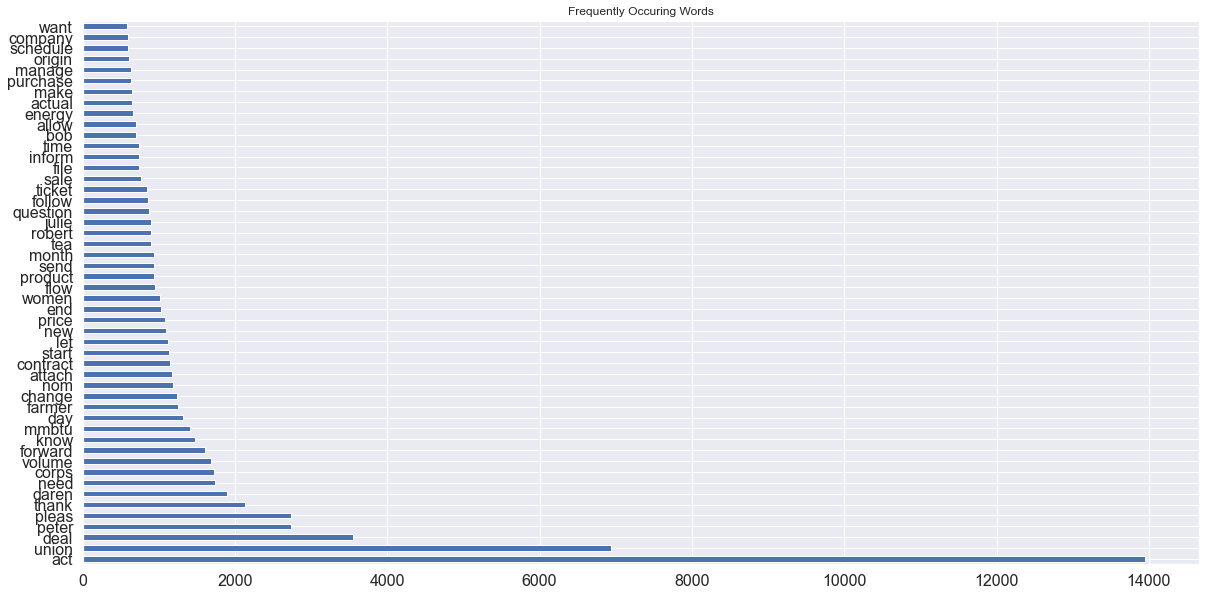

In [18]:
X_df.sum().sort_values(ascending=False).head(50).plot(kind='barh',
                                                                  figsize=(20,10),
                                                                  fontsize=16,
                                                                  title='Frequently Occuring Words');

In [19]:
X_df.sum().sort_values(ascending=False).head(50).to_frame()

,0
act,13955
union,6935
deal,3549
peter,2742
pleas,2737
thank,2130
daren,1901
need,1733
corps,1723
volume,1682


In [22]:
for i in range(true_k):
     print('Cluster d:', i)
    
     for ind in order_centroids[i, :20]:
        
        print(' ', terms[ind])

Cluster d: 0
  act
  union
  deal
  peter
  daren
  corps
  farmer
  thank
  forward
  pleas
  volume
  need
  mmbtu
  ticket
  robert
  contract
  start
  product
  know
  price
Cluster d: 1
  union
  deal
  pleas
  thank
  act
  peter
  need
  volume
  nom
  know
  daren
  attach
  change
  day
  mmbtu
  women
  forward
  let
  new
  tea
Cluster d: 2
  act
  union
  corps
  john
  robert
  den
  michael
  mary
  scott
  tom
  susan
  mark
  brian
  smith
  jim
  katherine
  steve
  lynn
  pari
  jack
Cluster d: 3
  act
  union
  peter
  pleas
  corps
  forward
  need
  deal
  robert
  daren
  thank
  volume
  allow
  jack
  farmer
  product
  julie
  know
  lloyd
  contract
Cluster d: 4
  act
  union
  corps
  peter
  deal
  robert
  albrecht
  melissa
  change
  coastal
  oil
  george
  grave
  pleas
  counterpart
  forward
  smith
  lisa
  corpora
  start


In [23]:
# confirming we still have our 'body' document
test_document = df['clean_msg'][0]
test_document

'union methanol peter follow note give monday preliminary flow data proved daren pleas overdid pop daily volume present zero reflect daily active obtain control change need sap economy purpose'

In [24]:
test_X = cv.transform([test_document])
test_X_dense = test_X.todense()

In [25]:
text_X_df = pd.DataFrame(test_X_dense, columns=cv.get_feature_names())
# creating new dense to correct for chopped of features earlier


In [26]:
text_X_df.head(5)

,aback,abacustech,able,absence,accept,access,accomplish,accord,accordingly,account,achieve,acquisit,act,action,active,actual,adam,add,address,adjust,administer,admit,adonai,advance,advantage,advice,advise,adviser,aet,affect,afford,afternoon,age,agenda,agent,ago,agreement,ague,ahead,aim,aime,air,airline,ajar,alan,albrecht,align,allen,allow,altar,alter,amazon,amend,america,american,ami,analysis,analyst,anderson,andrew,angel,angela,anita,ann,anna,anniversary,announce,annual,answer,anthony,anti,anticus,antoinette,apace,apology,appear,applied,apply,appoint,appreci,approach,appropri,approve,approxim,april,arched,area,aren,arm,armstrong,army,arrange,arrive,ask,asp,aspect,assess,asset,assign,assist,assume,atom,att,attach,attempt,attend,attract,audit,aug,august,austin,author,auto,automatic,avail,ave,average,avoid,award,away,baby,backout,bad,bag,bail,bailey,baker,balance,balfour,ball,ballot,bane,bank,bankruptcy,bar,barbara,barrel,barrington,base,baseload,basic,basin,basketful,bass,bassett,baxter,bc,beach,bear,beat,beaumont,beck,bed,began,begin,behalf,believe,belliard,bellum,belong,ben,benedict,benefit,bent,berg,best,beth,better,beverli,bid,big,billion,bind,bite,black,block,blood,blue,boa,board,boat,bob,bobby,bone,book,border,bowed,bowl,box,brandy,brandywine,bravo,bread,break,brennan,brian,bridgelin,brief,brigand,bring,bristol,broadband,broker,brother,brown,bruce,bryan,bryce,bubo,buckled,budget,build,burn,burri,bursa,bush,bushel,busy,button,buy,buyback,buyer,byron,cairo,cal,calendar,calhoun,california,calvin,camden,camelia,camp,campo,canada,canal,cancel,candid,cannon,cap,capable,capital,capture,car,card,care,carl,carlo,carried,carrier,carron,...,stuart,student,stuff,sub,submit,subscribe,substance,success,suggest,suit,sullivan,summary,summer,sun,sunday,sundial,superb,superior,supervisor,supplier,supply,support,suppose,sure,survey,survive,susan,suspend,sutton,swap,sweetly,swell,swift,swing,switch,sylvis,table,tailgat,talent,talk,tap,tar,target,task,tax,taylor,tea,teach,team,technology,ted,telephone,tell,tenaska,tender,tennessee,tennis,teno,term,test,tetanic,text,th,thank,thereof,theresa,thing,think,thomas,thompson,thompsonvil,thou,thursday,tibia,ticket,tidal,tie,tier,till,tim,time,timely,tiny,today,told,tom,tommy,tomorrow,tone,tonight,tool,topic,topics,torch,total,touch,tour,tournament,town,trace,trachea,track,trade,trader,train,trait,transact,transfer,transit,transmit,transport,travel,treat,trevino,trip,trouble,troy,true,truly,trust,try,trying,tuesday,tufts,turbotax,turn,turnaround,txt,type,unable,understand,unfortun,union,unit,unless,unresolv,unsubscrib,update,upgrade,upstream,urban,urgent,usage,use,user,usual,vacant,valadez,valet,valid,valley,valuable,value,valve,van,variance,various,vary,venturato,venture,vera,verify,version,vice,victor,victoria,video,view,viewpoint,village,villi,vincent,visit,vital,voice,voicemail,vol,volatile,volume,vot,vote,wager,wait,walk,walker,wall,walter,want,war,ward,warn,warned,warren,washington,watch,way,weather,web,wed,wednesday,week,weekend,weekly,welcome,welled,went,west,western,westmoreland,white,wholesale,wife,william,wilson,win,window,winter,wire,wiseman,wish,wished,withdraw,woman,women,won,wonder,wood,woodland,word,words,work,worksheet,world,worldnet,worldwide,worth,write,writeoff,wrong,www,xi,yakov,yanowski,yesterday,yonder,york,young,zapata,zero,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [28]:
print('Prediction')
predicted = model.predict(text_X_df)
print(predicted)

Prediction
[1]


In [29]:
model.cluster_centers_.shape

(5, 2000)

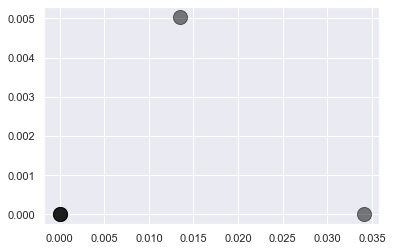

In [30]:
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

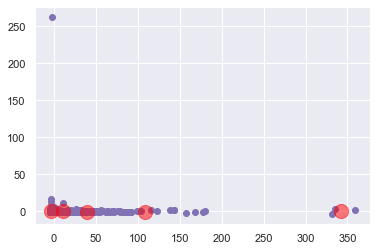

In [31]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X_df)

centers = model.cluster_centers_
pca_centers = pca.transform(centers)

plt.scatter(coords[:, 0], coords[:, 1], c='m')
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

In [32]:
pca.transform(model.cluster_centers_)

array([[ 1.04558393e+01,  3.31132139e-02],
       [-3.57145443e+00,  1.66568817e-03],
       [ 3.41935334e+02,  3.73661490e-02],
       [ 3.89126427e+01, -1.32946511e-01],
       [ 1.08388376e+02, -2.31528648e-01]])

In [33]:
X_df.shape

(3672, 2000)

In [34]:
X_df.tail()

,aback,abacustech,able,absence,accept,access,accomplish,accord,accordingly,account,achieve,acquisit,act,action,active,actual,adam,add,address,adjust,administer,admit,adonai,advance,advantage,advice,advise,adviser,aet,affect,afford,afternoon,age,agenda,agent,ago,agreement,ague,ahead,aim,aime,air,airline,ajar,alan,albrecht,align,allen,allow,altar,alter,amazon,amend,america,american,ami,analysis,analyst,anderson,andrew,angel,angela,anita,ann,anna,anniversary,announce,annual,answer,anthony,anti,anticus,antoinette,apace,apology,appear,applied,apply,appoint,appreci,approach,appropri,approve,approxim,april,arched,area,aren,arm,armstrong,army,arrange,arrive,ask,asp,aspect,assess,asset,assign,assist,assume,atom,att,attach,attempt,attend,attract,audit,aug,august,austin,author,auto,automatic,avail,ave,average,avoid,award,away,baby,backout,bad,bag,bail,bailey,baker,balance,balfour,ball,ballot,bane,bank,bankruptcy,bar,barbara,barrel,barrington,base,baseload,basic,basin,basketful,bass,bassett,baxter,bc,beach,bear,beat,beaumont,beck,bed,began,begin,behalf,believe,belliard,bellum,belong,ben,benedict,benefit,bent,berg,best,beth,better,beverli,bid,big,billion,bind,bite,black,block,blood,blue,boa,board,boat,bob,bobby,bone,book,border,bowed,bowl,box,brandy,brandywine,bravo,bread,break,brennan,brian,bridgelin,brief,brigand,bring,bristol,broadband,broker,brother,brown,bruce,bryan,bryce,bubo,buckled,budget,build,burn,burri,bursa,bush,bushel,busy,button,buy,buyback,buyer,byron,cairo,cal,calendar,calhoun,california,calvin,camden,camelia,camp,campo,canada,canal,cancel,candid,cannon,cap,capable,capital,capture,car,card,care,carl,carlo,carried,carrier,carron,...,stuart,student,stuff,sub,submit,subscribe,substance,success,suggest,suit,sullivan,summary,summer,sun,sunday,sundial,superb,superior,supervisor,supplier,supply,support,suppose,sure,survey,survive,susan,suspend,sutton,swap,sweetly,swell,swift,swing,switch,sylvis,table,tailgat,talent,talk,tap,tar,target,task,tax,taylor,tea,teach,team,technology,ted,telephone,tell,tenaska,tender,tennessee,tennis,teno,term,test,tetanic,text,th,thank,thereof,theresa,thing,think,thomas,thompson,thompsonvil,thou,thursday,tibia,ticket,tidal,tie,tier,till,tim,time,timely,tiny,today,told,tom,tommy,tomorrow,tone,tonight,tool,topic,topics,torch,total,touch,tour,tournament,town,trace,trachea,track,trade,trader,train,trait,transact,transfer,transit,transmit,transport,travel,treat,trevino,trip,trouble,troy,true,truly,trust,try,trying,tuesday,tufts,turbotax,turn,turnaround,txt,type,unable,understand,unfortun,union,unit,unless,unresolv,unsubscrib,update,upgrade,upstream,urban,urgent,usage,use,user,usual,vacant,valadez,valet,valid,valley,valuable,value,valve,van,variance,various,vary,venturato,venture,vera,verify,version,vice,victor,victoria,video,view,viewpoint,village,villi,vincent,visit,vital,voice,voicemail,vol,volatile,volume,vot,vote,wager,wait,walk,walker,wall,walter,want,war,ward,warn,warned,warren,washington,watch,way,weather,web,wed,wednesday,week,weekend,weekly,welcome,welled,went,west,western,westmoreland,white,wholesale,wife,william,wilson,win,window,winter,wire,wiseman,wish,wished,withdraw,woman,women,won,wonder,wood,woodland,word,words,work,worksheet,world,worldnet,worldwide,worth,write,writeoff,wrong,www,xi,yakov,yanowski,yesterday,yonder,york,young,zapata,zero,zone
3667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0

In [35]:
df.shape

(3672, 6)

In [36]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,label,text,label_num,clean_msg
3667,3667,5165,ham,"Subject: fw : crosstex energy , driscoll ranch...",0,crossed energy bristol ranch peter pleas note ...
3668,3668,5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0,put transport volume decrees contract thank am...
3669,3669,5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,follow nom he take extra much weekend try next...
3670,3670,5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,calvin daily women julie mention earlier hope ...
3671,3671,5169,ham,Subject: industrial worksheets for august 2000...,0,industry worksheet august active attach worksh...


In [37]:
X_df.shape # features

(3672, 2000)

In [38]:
merged_df = pd.merge(df, X_df, left_index=True, right_index=True)

In [39]:
merged_df.shape

(3672, 2006)

In [40]:
merged_df.tail()

,Unnamed: 0,Unnamed: 0.1,label,text_x,label_num,clean_msg,aback,abacustech,able,absence,accept,access,accomplish,accord,accordingly,account,achieve,acquisit,act,action,active,actual,adam,add,address,adjust,administer,admit,adonai,advance,advantage,advice,advise,adviser,aet,affect,afford,afternoon,age,agenda,agent,ago,agreement,ague,ahead,aim,aime,air,airline,ajar,alan,albrecht,align,allen,allow,altar,alter,amazon,amend,america,american,ami,analysis,analyst,anderson,andrew,angel,angela,anita,ann,anna,anniversary,announce,annual,answer,anthony,anti,anticus,antoinette,apace,apology,appear,applied,apply,appoint,appreci,approach,appropri,approve,approxim,april,arched,area,aren,arm,armstrong,army,arrange,arrive,ask,asp,aspect,assess,asset,assign,assist,assume,atom,att,attach,attempt,attend,attract,audit,aug,august,austin,author,auto,automatic,avail,ave,average,avoid,award,away,baby,backout,bad,bag,bail,bailey,baker,balance,balfour,ball,ballot,bane,bank,bankruptcy,bar,barbara,barrel,barrington,base,baseload,basic,basin,basketful,bass,bassett,baxter,bc,beach,bear,beat,beaumont,beck,bed,began,begin,behalf,believe,belliard,bellum,belong,ben,benedict,benefit,bent,berg,best,beth,better,beverli,bid,big,billion,bind,bite,black,block,blood,blue,boa,board,boat,bob,bobby,bone,book,border,bowed,bowl,box,brandy,brandywine,bravo,bread,break,brennan,brian,bridgelin,brief,brigand,bring,bristol,broadband,broker,brother,brown,bruce,bryan,bryce,bubo,buckled,budget,build,burn,burri,bursa,bush,bushel,busy,button,buy,buyback,buyer,byron,cairo,cal,calendar,calhoun,california,calvin,camden,camelia,camp,campo,canada,canal,cancel,candid,cannon,cap,capable,capital,capture,car,card,...,stuart,student,stuff,sub,submit,subscribe,substance,success,suggest,suit,sullivan,summary,summer,sun,sunday,sundial,superb,superior,supervisor,supplier,supply,support,suppose,sure,survey,survive,susan,suspend,sutton,swap,sweetly,swell,swift,swing,switch,sylvis,table,tailgat,talent,talk,tap,tar,target,task,tax,taylor,tea,teach,team,technology,ted,telephone,tell,tenaska,tender,tennessee,tennis,teno,term,test,tetanic,text_y,th,thank,thereof,theresa,thing,think,thomas,thompson,thompsonvil,thou,thursday,tibia,ticket,tidal,tie,tier,till,tim,time,timely,tiny,today,told,tom,tommy,tomorrow,tone,tonight,tool,topic,topics,torch,total,touch,tour,tournament,town,trace,trachea,track,trade,trader,train,trait,transact,transfer,transit,transmit,transport,travel,treat,trevino,trip,trouble,troy,true,truly,trust,try,trying,tuesday,tufts,turbotax,turn,turnaround,txt,type,unable,understand,unfortun,union,unit,unless,unresolv,unsubscrib,update,upgrade,upstream,urban,urgent,usage,use,user,usual,vacant,valadez,valet,valid,valley,valuable,value,valve,van,variance,various,vary,venturato,venture,vera,verify,version,vice,victor,victoria,video,view,viewpoint,village,villi,vincent,visit,vital,voice,voicemail,vol,volatile,volume,vot,vote,wager,wait,walk,walker,wall,walter,want,war,ward,warn,warned,warren,washington,watch,way,weather,web,wed,wednesday,week,weekend,weekly,welcome,welled,went,west,western,westmoreland,white,wholesale,wife,william,wilson,win,window,winter,wire,wiseman,wish,wished,withdraw,woman,women,won,wonder,wood,woodland,word,words,work,worksheet,world,worldnet,worldwide,worth,write,writeoff,wrong,www,xi,yakov,yanowski,yesterday,yonder,york,young,zapata,zero,zone
3667,3667,5165,ham,"Subject: fw : crosstex energy , driscoll ranch...",0,crossed energy bristol ranch peter pleas note ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [41]:
merged_df.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
label           object
text_x          object
label_num        int64
                 ...  
york             int64
young            int64
zapata           int64
zero             int64
zone             int64
Length: 2006, dtype: object

In [42]:
merged_df

,Unnamed: 0,Unnamed: 0.1,label,text_x,label_num,clean_msg,aback,abacustech,able,absence,accept,access,accomplish,accord,accordingly,account,achieve,acquisit,act,action,active,actual,adam,add,address,adjust,administer,admit,adonai,advance,advantage,advice,advise,adviser,aet,affect,afford,afternoon,age,agenda,agent,ago,agreement,ague,ahead,aim,aime,air,airline,ajar,alan,albrecht,align,allen,allow,altar,alter,amazon,amend,america,american,ami,analysis,analyst,anderson,andrew,angel,angela,anita,ann,anna,anniversary,announce,annual,answer,anthony,anti,anticus,antoinette,apace,apology,appear,applied,apply,appoint,appreci,approach,appropri,approve,approxim,april,arched,area,aren,arm,armstrong,army,arrange,arrive,ask,asp,aspect,assess,asset,assign,assist,assume,atom,att,attach,attempt,attend,attract,audit,aug,august,austin,author,auto,automatic,avail,ave,average,avoid,award,away,baby,backout,bad,bag,bail,bailey,baker,balance,balfour,ball,ballot,bane,bank,bankruptcy,bar,barbara,barrel,barrington,base,baseload,basic,basin,basketful,bass,bassett,baxter,bc,beach,bear,beat,beaumont,beck,bed,began,begin,behalf,believe,belliard,bellum,belong,ben,benedict,benefit,bent,berg,best,beth,better,beverli,bid,big,billion,bind,bite,black,block,blood,blue,boa,board,boat,bob,bobby,bone,book,border,bowed,bowl,box,brandy,brandywine,bravo,bread,break,brennan,brian,bridgelin,brief,brigand,bring,bristol,broadband,broker,brother,brown,bruce,bryan,bryce,bubo,buckled,budget,build,burn,burri,bursa,bush,bushel,busy,button,buy,buyback,buyer,byron,cairo,cal,calendar,calhoun,california,calvin,camden,camelia,camp,campo,canada,canal,cancel,candid,cannon,cap,capable,capital,capture,car,card,...,stuart,student,stuff,sub,submit,subscribe,substance,success,suggest,suit,sullivan,summary,summer,sun,sunday,sundial,superb,superior,supervisor,supplier,supply,support,suppose,sure,survey,survive,susan,suspend,sutton,swap,sweetly,swell,swift,swing,switch,sylvis,table,tailgat,talent,talk,tap,tar,target,task,tax,taylor,tea,teach,team,technology,ted,telephone,tell,tenaska,tender,tennessee,tennis,teno,term,test,tetanic,text_y,th,thank,thereof,theresa,thing,think,thomas,thompson,thompsonvil,thou,thursday,tibia,ticket,tidal,tie,tier,till,tim,time,timely,tiny,today,told,tom,tommy,tomorrow,tone,tonight,tool,topic,topics,torch,total,touch,tour,tournament,town,trace,trachea,track,trade,trader,train,trait,transact,transfer,transit,transmit,transport,travel,treat,trevino,trip,trouble,troy,true,truly,trust,try,trying,tuesday,tufts,turbotax,turn,turnaround,txt,type,unable,understand,unfortun,union,unit,unless,unresolv,unsubscrib,update,upgrade,upstream,urban,urgent,usage,use,user,usual,vacant,valadez,valet,valid,valley,valuable,value,valve,van,variance,various,vary,venturato,venture,vera,verify,version,vice,victor,victoria,video,view,viewpoint,village,villi,vincent,visit,vital,voice,voicemail,vol,volatile,volume,vot,vote,wager,wait,walk,walker,wall,walter,want,war,ward,warn,warned,warren,washington,watch,way,weather,web,wed,wednesday,week,weekend,weekly,welcome,welled,went,west,western,westmoreland,white,wholesale,wife,william,wilson,win,window,winter,wire,wiseman,wish,wished,withdraw,woman,women,won,wonder,wood,woodland,word,words,work,worksheet,world,worldnet,worldwide,worth,write,writeoff,wrong,www,xi,yakov,yanowski,yesterday,yonder,york,young,zapata,zero,zone
0,0,0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,union methanol peter follow note give monday p...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,